In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist #To get access to MNIST Dataset of keras
from keras.models import Sequential #Allowing us to define our Neural model
from keras.layers import Dense #Connecting all the layers with preceding layers to develop fully connected network
from keras.optimizers import Adam #Dealing with multi class dataset
from keras.utils.np_utils import to_categorical #Allows taking labels as inputs and reformated them into One Hot Encoded form
import random


In [0]:
np.random.seed(0)

In [0]:
(X_train, y_train),(X_test, y_test) = mnist.load_data() #Loading data from mnist dataset in form of tuple, thus have(), ()


In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
#To verify the data is consisitent or each image has labels
assert(X_train.shape[0] == y_train.shape[0]), "The number if images is not equal to number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number if images is not equal to number of labels."

#To verify the image size 28*28 pixels
assert(X_train.shape[1:] == (28,28)), "The Dimensions of images are not 28*28"
assert(X_test.shape[1:] == (28,28)), "The Dimensions of images are not 28*28"

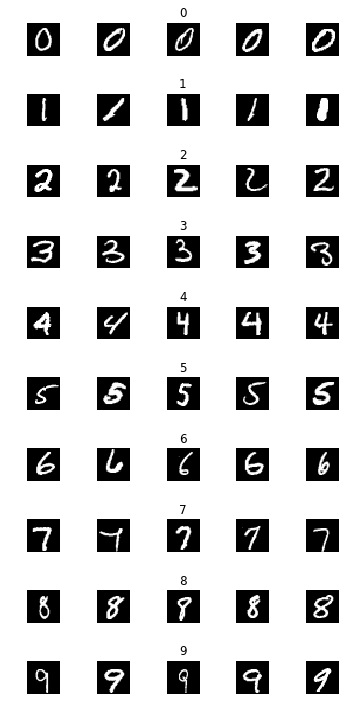

In [6]:
#Plot and analyze the data to visualize each class if images present between 0 to 9
num_of_samples = [] #Amount of images in each of the ten categories
cols = 5 
num_classes = 10

fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize = (5,10))
fig.tight_layout()

#Create a nested for loop

for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j] #Take all data stored in X_train but keep the data with labels with j only
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap = plt.get_cmap("gray"))
        
        axs[j][i].axis("off") #To not display axis
        
        if i == 2:
            axs[j][i].set_title(str(j))
            
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

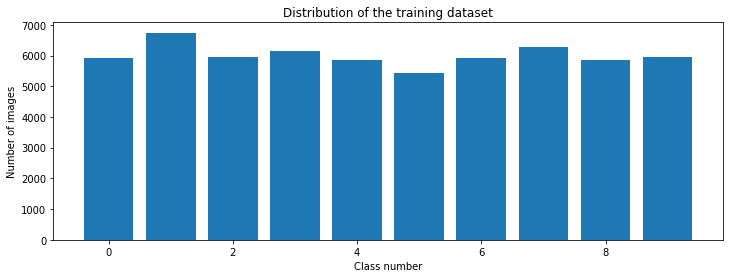

In [7]:

print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [0]:
#Perform one hot encoding

y_train = to_categorical(y_train, 10) #Labelled data that needs to be encoded, total number of classes
y_test = to_categorical(y_test, 10)

In [0]:
#Normalization (Choose to divde by 255 because we want the value between 0-1 and the max pixel value is 255)
#Scales data to uniform range and decreases the variance of the data

X_train = X_train/255
X_test = X_test/255

In [0]:
#Flatten the array to make images 1D for feedforward process
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [11]:
'''
def create_model():
    model = Sequential() #To define our model
    model.add(Dense(10, input_dim = num_pixels, activation="relu")) #To add hidden layers with as many nodes in each layer
                                        #One hidden layer with 10 nodes, preceding with input layer with input = pixels
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation = "relu"))
    model.add(Dense(num_classes, activation="softmax")) #Output layer, softmax converts everything to probabilities
    model.compile(Adam(lr = 0.01), loss = "categorical_crossentropy", metrics = ["accuracy"]) 
    
    return model

#Increasing the number of nodes in a layer, will train the model pretty well. The training set will be memorized rather than learn
'''

'\ndef create_model():\n    model = Sequential() #To define our model\n    model.add(Dense(10, input_dim = num_pixels, activation="relu")) #To add hidden layers with as many nodes in each layer\n                                        #One hidden layer with 10 nodes, preceding with input layer with input = pixels\n    model.add(Dense(30, activation=\'relu\'))\n    model.add(Dense(10, activation = "relu"))\n    model.add(Dense(num_classes, activation="softmax")) #Output layer, softmax converts everything to probabilities\n    model.compile(Adam(lr = 0.01), loss = "categorical_crossentropy", metrics = ["accuracy"]) \n    \n    return model\n\n#Increasing the number of nodes in a layer, will train the model pretty well. The training set will be memorized rather than learn\n'

In [0]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [13]:
model = create_model()
print(model.summary())

W0718 21:12:40.836444 140337676744576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0718 21:12:40.875955 140337676744576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0718 21:12:40.884946 140337676744576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0718 21:12:40.964181 140337676744576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0718 21:12:40.979334 140337676744576 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
#To fit our training data
history = model.fit(X_train, y_train, validation_split = 0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)
#verbose is to display progress bar of info
#Depenging upon epochs, validation loss and training loss are changed
#Higher epoch like more than 30 gives more validation loss, meaning training set is perfectly fir but validation error is not
#Lower epoch like 2, makes them very far away

W0718 21:12:42.874351 140337676744576 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0718 21:12:42.940242 140337676744576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 33us/step - loss: 0.6146 - acc: 0.8103 - val_loss: 0.3186 - val_acc: 0.9037
Epoch 2/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.3549 - acc: 0.8972 - val_loss: 0.2825 - val_acc: 0.9198
Epoch 3/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.3122 - acc: 0.9088 - val_loss: 0.2581 - val_acc: 0.9222
Epoch 4/10
54000/54000 [==============================] - 1s 19us/step - loss: 0.2930 - acc: 0.9131 - val_loss: 0.2508 - val_acc: 0.9252
Epoch 5/10
54000/54000 [==============================] - 1s 19us/step - loss: 0.2808 - acc: 0.9167 - val_loss: 0.2349 - val_acc: 0.9290
Epoch 6/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.2615 - acc: 0.9217 - val_loss: 0.2253 - val_acc: 0.9345
Epoch 7/10
54000/54000 [==============================] - 1s 19us/step - loss: 0.2565 - acc: 0.9220 - val_loss: 0.2349 - val_acc:

Text(0.5, 0, 'epoch')

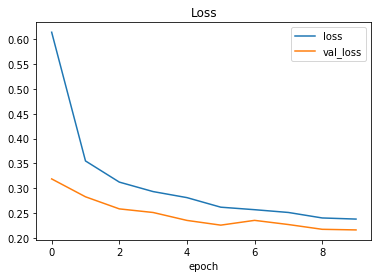

In [15]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["loss", "val_loss"])
plt.title("Loss")
plt.xlabel("epoch")

Text(0.5, 0, 'epoch')

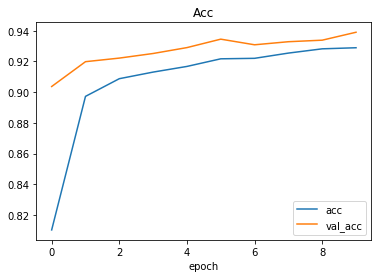

In [16]:
#Plotting the accuracy

plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.legend(["acc", "val_acc"])
plt.title("Acc")
plt.xlabel("epoch")

In [17]:
#To test on new unlabelled data
score = model.evaluate(X_test, y_test, verbose = 0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.25884242834597826
Test accuracy: 0.9256


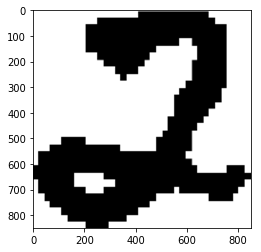

In [23]:
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)




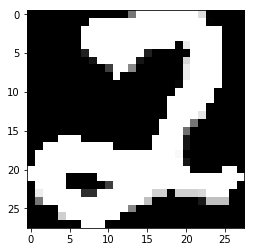

In [24]:
import cv2
img_array = np.asarray(img) #converts input data as array
resized = cv2.resize(img_array, (28,28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap = plt.get_cmap("gray"))

In [0]:
image = image/255
image = image.reshape(1, 784)

In [26]:
prediction = model.predict_classes(image)
print("Predicted digit:", str(prediction))

Predicted digit: [6]
